# Reseau neuronal

- Le but de ce dossier est de prédire les survivants du titanic.
- Je cré un fichier (submission.csv) pour le soumettre à Kaggle.
- Ce fichier contient 2 colonnes:
- PassengerId qui provient du fichier de test
- Survived contient les prédictions obtenues à partir des données de (test) par le réseau de neurones

Avant de commencer, il est trés important de bien connaitre le contenu du fichier csv
 - Savoir combien il y a de lignes et de colonnes.
 - la présence de données catégorielles ou non
 - identifier la cible ou target ou variable à expliquée.


In [1]:
# j'importe les bibliotheques...........

import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns 
%matplotlib inline



In [2]:

# Je charge les 2 dataframe train et test

train = pd.read_csv('train.csv')

test = pd.read_csv('test.csv')



- PassengerId = est l'identifiant unique de la ligne et il n'a aucun effet sur la cible
- Survived    = est la variable cible que nous essayons de prédire (0 ou 1)
- Pclass      = (Classe Passager) est le statut socio-économique du passager et il s'agit d'une caractéristique ordinale catégorielle qui a 3 valeurs uniques (1, 2 ou 3)
- Name
- Sex
- Age
- SibSp       = est le nombre total de frères et sœurs et du conjoint des passagers
- Parch       = est le nombre total de parents et d'enfants des passagers
- Ticket      = est le numéro de billet du passager
- Fare        = est le tarif passager
- Cabin       = est le numéro de cabine du passager
- Embarked    = est le port d'embarquement et c'est une caractéristique catégorielle qui a 3 valeurs uniques 
- C = Cherbourg
- Q = Queenstown
- S = Southampton

In [4]:
# je visualise les données d'entrainement................

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# je visualise le nombre de lignes et de colonnes...........
# 891 lignes et 12 colonnes
train.shape

(891, 12)

- train contient 12 colonnes avec la cible à prédire ici - Survived -


In [5]:
# je visualise les données de test.......

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# je visualise le nombre de lignes et de colonnes.........

test.shape

(418, 11)

- test contient 11 colonnes. Ce dataframe ne contient pas volontairement la colonne - Survived -
- Il contient la colonne - PassengerId - qui représente l'identification des passagers
- Je vais isoler cette colonne pour créer un autre dataframe
- Ce dataframe va contenir cette colonne et en face les prédictions - Survived -

## Traitement du dataframe

In [7]:
# je supprime les colonnes inutiles de l'ensemble - train -

train = train.drop('Name', axis=1)
train = train.drop('Ticket', axis=1)
train = train.drop('Cabin', axis=1)



test = test.drop('Name', axis=1)
test = test.drop('Ticket', axis=1)
test = test.drop('Cabin', axis=1)



In [8]:
# Je visualise les modifications......

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [9]:
# Je visualise les modification dans les données de test

test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [10]:
# une methode pour convertir.........
# pour avoir moins de colonnes
# Pour Convertir la colonnes Sex en valeurs numériques (0 pour male, 1 pour female)


train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

In [11]:
# je remplace par des variables numériques les ports d'embarquement ........;

train['Embarked'] = train['Embarked'].map({'Q': 0, 'S': 1, 'C': 2})
test['Embarked'] = test['Embarked'].map({'Q': 0, 'S': 1, 'C': 2})

In [13]:
# une autre méthode pour le codage catégorielle...................
# je code les variables catégorielles pour train et test

#train = pd.get_dummies(train, columns=["Sex", "Embarked"])

#test = pd.get_dummies(test, columns=["Sex","Embarked"])

#train.head(5)

In [12]:
# Je visualise les modification dans les données..............

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,1.0
1,2,1,1,1,38.0,1,0,71.2833,2.0
2,3,1,3,1,26.0,0,0,7.9250,1.0
3,4,1,1,1,35.0,1,0,53.1000,1.0
4,5,0,3,0,35.0,0,0,8.0500,1.0


In [13]:
# j'isole la variable à expliquer ici - Survived -  des variables explicatives

X = train.drop("Survived", axis=1)
y = train["Survived"] # cible



In [14]:
# je visualise le résultat............

X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,0,22.0,1,0,7.2500,1.0
1,2,1,1,38.0,1,0,71.2833,2.0
2,3,3,1,26.0,0,0,7.9250,1.0
3,4,1,1,35.0,1,0,53.1000,1.0
4,5,3,0,35.0,0,0,8.0500,1.0
...,...,...,...,...,...,...,...,...
886,887,2,0,27.0,0,0,13.0000,1.0
887,888,1,1,19.0,0,0,30.0000,1.0
888,889,3,1,NaN,1,2,23.4500,1.0
889,890,1,0,26.0,0,0,30.0000,2.0


In [17]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [15]:
# Je Normalise les variables explicatives X ..............
# Scaler Min-Max

from sklearn.preprocessing import MinMaxScaler

col_names = X.columns
features = X[col_names]

scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_X = pd.DataFrame(features, columns = col_names)
scaled_X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.000000,1.0,0.0,0.271174,0.125,0.0,0.014151,0.5
1,0.001124,0.0,1.0,0.472229,0.125,0.0,0.139136,1.0
2,0.002247,1.0,1.0,0.321438,0.000,0.0,0.015469,0.5
3,0.003371,0.0,1.0,0.434531,0.125,0.0,0.103644,0.5
4,0.004494,1.0,0.0,0.434531,0.000,0.0,0.015713,0.5


In [16]:
# Je normalise les données de test................
# Scaler Min-Max

from sklearn.preprocessing import MinMaxScaler

col_names = test.columns
features = test[col_names]

scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_test = pd.DataFrame(features, columns = col_names)
scaled_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.000000,1.0,0.0,0.452723,0.000,0.000000,0.015282,0.0
1,0.002398,1.0,1.0,0.617566,0.125,0.000000,0.013663,0.5
2,0.004796,0.5,0.0,0.815377,0.000,0.000000,0.018909,0.0
3,0.007194,1.0,0.0,0.353818,0.000,0.000000,0.016908,0.5
4,0.009592,1.0,1.0,0.287881,0.125,0.111111,0.023984,0.5


In [17]:
# je verifie si il y a des données nan pour les variables explicatives scaled_X données d entrainement

scaled_X.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [18]:
# # je verifie si il y a des données nan pour les variables explicatives scaled_test données de test

scaled_test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [19]:
# Pour les données de test 
# Je remplace les valeurs manquantes des colonnes par la moyenne de la colonne
# ici - Age - et -Fare -

scaled_test = scaled_test.fillna(value=scaled_test['Age'].mean())
scaled_test = scaled_test.fillna(value=scaled_test['Fare'].mean())

# Je  vérifie les modifications.....

scaled_test.isnull().sum()


PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [20]:
# Je remplace les valeurs manquantes de colonne par la moyenne de la colonne

scaled_X = scaled_X.fillna(value=scaled_X['Age'].mean())
scaled_X = scaled_X.fillna(value=scaled_X['Fare'].mean())

# Je vérifie les modifications..............

scaled_X.isnull().sum()


PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [21]:
# ma méthode pour vectoriser les données

vectorisation_X=np.asarray(scaled_X)
vectorisation_y=np.asarray(y)

In [30]:
# je vectorise les données de test

vectorisation_test=np.asarray(scaled_test)

In [22]:
vectorisation_X[0:2]

array([[0.        , 1.        , 0.        , 0.27117366, 0.125     ,
        0.        , 0.01415106, 0.5       ],
       [0.0011236 , 0.        , 1.        , 0.4722292 , 0.125     ,
        0.        , 0.13913574, 1.        ]])

In [57]:
import tensorflow as tf

# Architecture du model

model = tf.keras.Sequential([
  tf.keras.layers.Dense(32, activation='relu', input_shape=[8]),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid'),
])

# Compilation du model

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])


# Pour entrainer le model

history=model.fit(vectorisation_X, vectorisation_y, epochs=500)




Epoch 1/500
28/28 [==============================] - 1s 2ms/step - loss: 0.6639 - binary_accuracy: 0.6184
Epoch 2/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6164 - binary_accuracy: 0.6577
Epoch 3/500
28/28 [==============================] - 0s 2ms/step - loss: 0.5638 - binary_accuracy: 0.7789
Epoch 4/500
28/28 [==============================] - 0s 2ms/step - loss: 0.5014 - binary_accuracy: 0.8025
Epoch 5/500
28/28 [==============================] - 0s 2ms/step - loss: 0.4678 - binary_accuracy: 0.8058
Epoch 6/500
28/28 [==============================] - 0s 2ms/step - loss: 0.4553 - binary_accuracy: 0.8013
Epoch 7/500
28/28 [==============================] - 0s 2ms/step - loss: 0.4475 - binary_accuracy: 0.8036
Epoch 8/500
28/28 [==============================] - 0s 2ms/step - loss: 0.4409 - binary_accuracy: 0.8047
Epoch 9/500
28/28 [==============================] - 0s 2ms/step - loss: 0.4376 - binary_accuracy: 0.8013
Epoch 10/500
28/28 [==========================

28/28 [==============================] - 0s 2ms/step - loss: 0.3624 - binary_accuracy: 0.8451
Epoch 154/500
28/28 [==============================] - 0s 2ms/step - loss: 0.3626 - binary_accuracy: 0.8496
Epoch 155/500
28/28 [==============================] - 0s 1ms/step - loss: 0.3624 - binary_accuracy: 0.8507
Epoch 156/500
28/28 [==============================] - 0s 2ms/step - loss: 0.3609 - binary_accuracy: 0.8507
Epoch 157/500
28/28 [==============================] - 0s 2ms/step - loss: 0.3625 - binary_accuracy: 0.8507
Epoch 158/500
28/28 [==============================] - 0s 1ms/step - loss: 0.3617 - binary_accuracy: 0.8474
Epoch 159/500
28/28 [==============================] - 0s 2ms/step - loss: 0.3621 - binary_accuracy: 0.8462
Epoch 160/500
28/28 [==============================] - 0s 2ms/step - loss: 0.3613 - binary_accuracy: 0.8507
Epoch 161/500
28/28 [==============================] - 0s 2ms/step - loss: 0.3606 - binary_accuracy: 0.8485
Epoch 162/500
28/28 [=====================

Epoch 229/500
28/28 [==============================] - 0s 2ms/step - loss: 0.3521 - binary_accuracy: 0.8507
Epoch 230/500
28/28 [==============================] - 0s 2ms/step - loss: 0.3522 - binary_accuracy: 0.8496
Epoch 231/500
28/28 [==============================] - 0s 2ms/step - loss: 0.3522 - binary_accuracy: 0.8530
Epoch 232/500
28/28 [==============================] - 0s 1ms/step - loss: 0.3518 - binary_accuracy: 0.8541
Epoch 233/500
28/28 [==============================] - 0s 2ms/step - loss: 0.3540 - binary_accuracy: 0.8474
Epoch 234/500
28/28 [==============================] - 0s 2ms/step - loss: 0.3505 - binary_accuracy: 0.8474
Epoch 235/500
28/28 [==============================] - 0s 2ms/step - loss: 0.3504 - binary_accuracy: 0.8519
Epoch 236/500
28/28 [==============================] - 0s 1ms/step - loss: 0.3512 - binary_accuracy: 0.8519
Epoch 237/500
28/28 [==============================] - 0s 2ms/step - loss: 0.3498 - binary_accuracy: 0.8496
Epoch 238/500
28/28 [=======

Epoch 380/500
28/28 [==============================] - 0s 2ms/step - loss: 0.3307 - binary_accuracy: 0.8541
Epoch 381/500
28/28 [==============================] - 0s 2ms/step - loss: 0.3323 - binary_accuracy: 0.8541
Epoch 382/500
28/28 [==============================] - 0s 2ms/step - loss: 0.3349 - binary_accuracy: 0.8519
Epoch 383/500
28/28 [==============================] - 0s 2ms/step - loss: 0.3321 - binary_accuracy: 0.8541
Epoch 384/500
28/28 [==============================] - 0s 2ms/step - loss: 0.3322 - binary_accuracy: 0.8541
Epoch 385/500
28/28 [==============================] - 0s 1ms/step - loss: 0.3312 - binary_accuracy: 0.8563
Epoch 386/500
28/28 [==============================] - 0s 2ms/step - loss: 0.3307 - binary_accuracy: 0.8563
Epoch 387/500
28/28 [==============================] - 0s 2ms/step - loss: 0.3300 - binary_accuracy: 0.8552
Epoch 388/500
28/28 [==============================] - 0s 1ms/step - loss: 0.3301 - binary_accuracy: 0.8541
Epoch 389/500
28/28 [=======

In [58]:
resultats = model.evaluate(scaled_X,y)

28/28 [==============================] - 0s 1ms/step - loss: 0.3081 - binary_accuracy: 0.8608


<AxesSubplot:title={'center':'Loss and Accuracy'}>

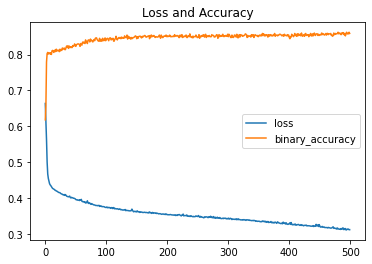

In [59]:
# Je trace la perte et la précision 

pd.DataFrame(history.history).plot(title="Loss and Accuracy")

In [60]:
# Enregistrement du modele dans un fichier .hdf5

model.save('model1.hdf5')

In [64]:
# methode pour creer fichier de submission.csv

prediction = model.predict(vectorisation_test)
submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = prediction
submission.loc[submission['Survived']>=0.5, 'Survived'] = 1
submission.loc[submission['Survived']<0.5, 'Survived'] = 0
submission.Survived = submission.Survived.astype(int)



In [65]:
# je sauvegarde le fichier au format csv

submission.to_csv('gender_submission4.csv',index=False)

In [72]:
# Une autre methode pour creer le fichier submission.csv

submit = pd.DataFrame({"PassengerId":test.PassengerId, 'Survived':predict})
submit.to_csv("final_submission.csv",index = False)


In [73]:
submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [75]:
# une methode d'afficher les prédictions..................

predict = model.predict(vectorisation_test)
predict = (predict > 0.5).astype(int).ravel()
print(predict)



[0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 0 0 0]


In [76]:
# j'affiche les performances.............

from sklearn import metrics

Y_pred_rand = (model.predict(vectorisation_X) > 0.5).astype(int)
print('Precision : ', np.round(metrics.precision_score(vectorisation_y, Y_pred_rand)*100,2))
print('Accuracy : ', np.round(metrics.accuracy_score(vectorisation_y, Y_pred_rand)*100,2))
print('Recall : ', np.round(metrics.recall_score(vectorisation_y, Y_pred_rand)*100,2))
print('F1 score : ', np.round(metrics.f1_score(vectorisation_y, Y_pred_rand)*100,2))
print('AUC : ', np.round(metrics.roc_auc_score(vectorisation_y, Y_pred_rand)*100,2))


Precision :  89.49
Accuracy :  86.08
Recall :  72.22
F1 score :  79.94
AUC :  83.47


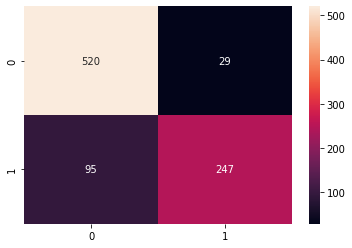

In [77]:
# J'affiche la matrice de confusion........

matrix = metrics.confusion_matrix(vectorisation_y, Y_pred_rand)
sns.heatmap(matrix, annot = True,fmt = 'g')
plt.show()


- 520 morts
- 246 survecus

- 520 + 247 = 767 prédictions exactes.
- 95 + 29 = 124 fausses prédictions.

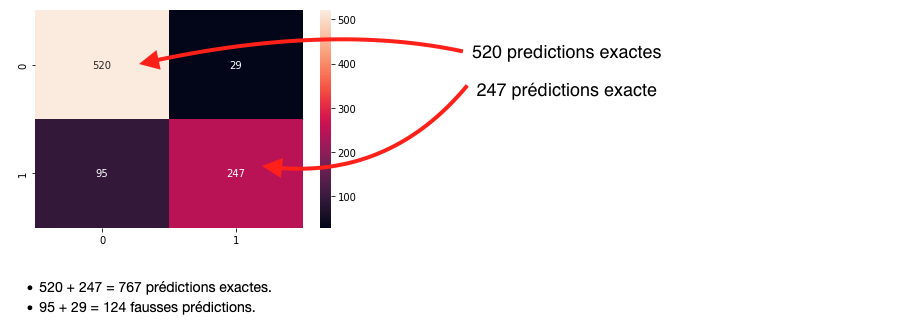

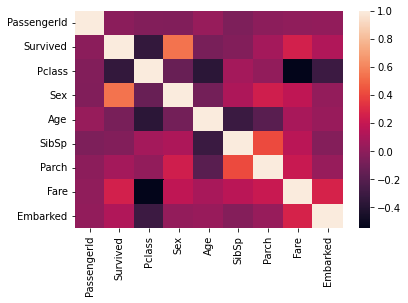

In [78]:
# carte thermique de correlation........
# Pour calculer la corrélation entre les différentes variables 

corr_train = train.corr()
sns.heatmap(corr_train)
plt.show()


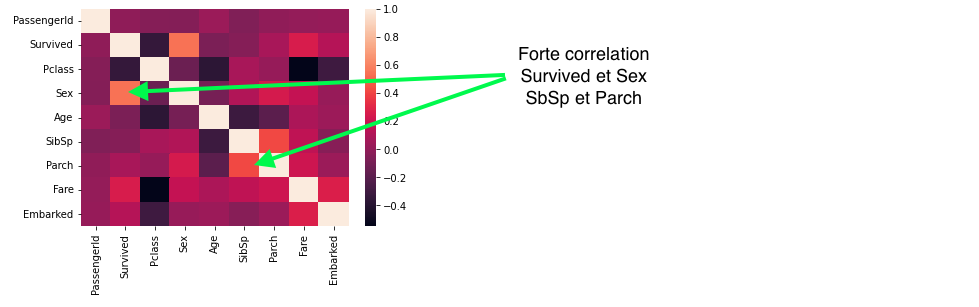